# Linear Regression

$$h_1(w)= w_0x_0 + w_1x_1$$
$$x_0 = 1$$
$$=> h_1(w)= w_0 + w_1x_1$$

- Univariate linear regression
  + Hypothesis: $h_w(x) = w_0 + w_1x_1$

- Cost function:
  + $J(w) = 1/2m * sum(h_w(x^i) - y^i)^2 $ \
  + Trong đó:
      - $h_w(x^1)$ là giá tri predict
      - $y^i$ là giá trị thực tế


## Simplified
$$h_w(x) = w_1x$$
$$w_1$$
$$J(w_1) = 1/2m * sum(h_w(x^i) - y^i)^2$$
minimize $J(w_1)$

Have some function $J(w_0,w_1)$

Want min $J(w_0, w_1)$

- Outline:
  - Start with some $w_0, w_1$
  - Keep changing $w_0, w_1$ to reduce $J(w_0, w_1)$ until we hopefully end up at a minimum

##Gradient Descent algorithm $(w_0, w_1)$

$$w_0 = w_0 - α\frac{∂J}{∂w_0} = w_0 - α(\frac{1}{m}∑((w_0 + w_1x_i) - y_i)) $$
$$w_1 = w_1 - α\frac{∂J}{∂w_1} =  w_1 - α(\frac{1}{m}∑((w_0 + w_1x_i) - y_i)x_i) $$

$α$ là learning rate

Tip: Không cần thiết giảm $α$ trong mỗi lần

Secant line là đường cắt tuyến \
Tangent line là đường tiếp tuyến

Slope: $m = \frac{rise}{run} = \frac{y_2 - y_1}{x_2 - x_1}$



## Điều kiện dừng:
- Case1: $J(w_0,w_1) = 0$
- Case2: $|J_t - J_s| = ϵ = 0,001 =$ hằng số
- Case3: iteration (for i in range(1000))

## "Batch" Gradient Descent
"Batch": Each step of GD uses all the training examples

In [1]:
from google.colab import drive #import thư mục trong Google Drive vào Colab
drive.mount('/content/drive') #mount vào thư mục content

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Problem1.csv')

df.head()

,Hours of Study,Exam Score
0,1.2,300
1,1.7,470
2,4.0,500
3,6.0,600
4,5.5,500


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:,1]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Random Training 70% Testing 30%

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=42)

In [10]:
regression = LinearRegression()

In [11]:
regression.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred_train = regression.predict(X_train)

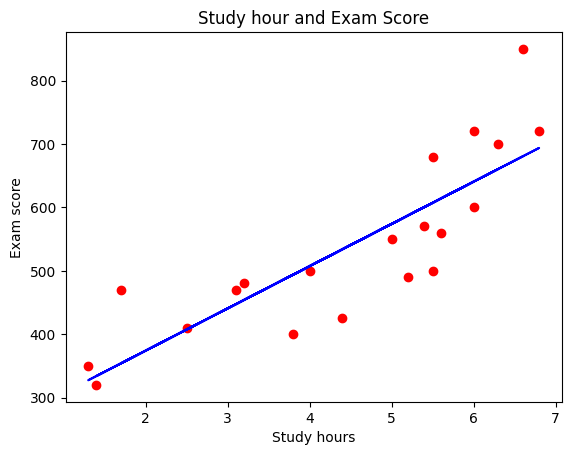

In [15]:
#Draw the training result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_pred_train, color='blue')
plt.title('Study hour and Exam Score')
plt.xlabel('Study hours')
plt.ylabel('Exam score')
plt.show()

In [16]:
y_pred_test = regression.predict(X_test)

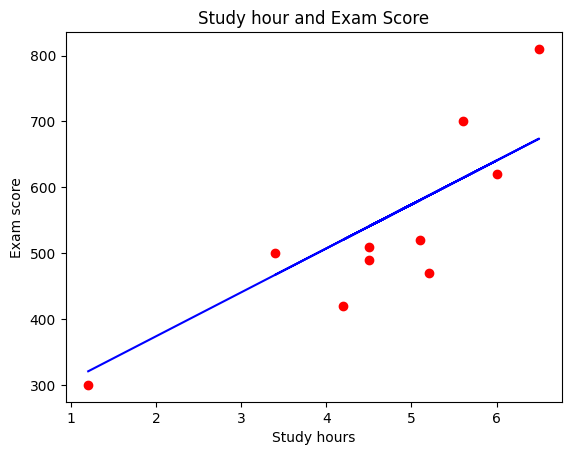

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred_test, color='blue')
plt.title('Study hour and Exam Score')
plt.xlabel('Study hours')
plt.ylabel('Exam score')
plt.show()

In [21]:
print("RMSE: {}".format(mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=False)))

RMSE: 76.74476161206005


In [24]:
#Dự đoán Study hours là 10 giờ
studyHours = 10
predicatedScore = regression.predict(np.array([[studyHours]]))
print(predicatedScore)

[907.05129965]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Dùng giải thuật Gradient Descent mới vừa học

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Problem2.txt', header=None)

df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,1]

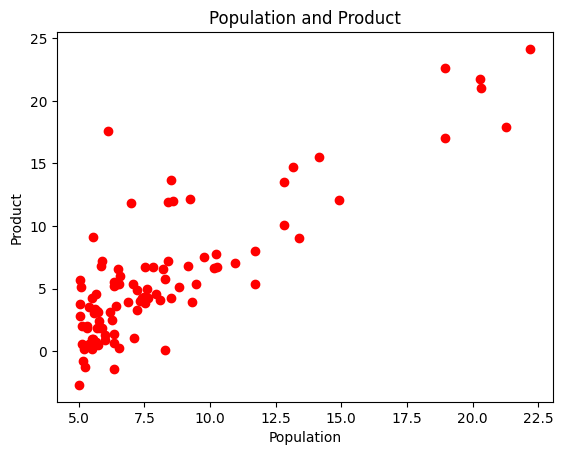

In [28]:
#Draw biểu đồ
plt.scatter(X, y, color = 'red')
plt.title('Population and Product')
plt.xlabel('Population')
plt.ylabel('Product')
plt.show()

### Define the cost function J(theta0, theta1)

In [29]:
#Define the Cost function
def calculate_cost_value(x, y, theta):
  #theta = [[theta0],[theta1]]
  return 1/(2*len(y)) + np.sum((x.dot(theta) - y)**2)

In [36]:
dataValues = df.values #Lấy dữ liệu trong dataset
m = len(df) # tính all examples

# np.ones(m,1): phần tử x_0 đều là 1, .reshape(m,1) phần tử x1 là Population
#axis=1 append theo dạng cột
X = np.append(np.ones((m,1)), dataValues[:,0].reshape(m,1), axis=1)

y = dataValues[:, 1].reshape(m,1) # m dòng 1 cột

theta = np.zeros((2,1)) # theta_0 = theta_1 = 0

In [39]:
#Print sesult J(0,0)
costValue = calculate_cost_value(X, y, theta)
print(costValue)

6222.115526865576


### Define Gradient Descent

In [46]:
def Gradient_Descent(X, y, theta, learning_rate, number_of_iteration=3000, epsilon=1e-5):
  m = len(y) #Tổng số examples
  costs_history = []

  for i in range(number_of_iteration):
    predictedValue = X.dot(theta) # [[1, x_i]] @ [[theta0],[theta1]]
    error = np.dot(X.transpose(), predictedValue - y)
    gradient = learning_rate * 1/m * error
    theta -= gradient # when gradient > 0
    costs_history.append(calculate_cost_value(X, y, theta))

  return theta, costs_history

In [47]:
theta, costs_history = Gradient_Descent(X, y, theta, 0.01)
print("H(theta)= {} + {}x".format(theta[0, 0], theta[1, 0]))

H(theta)= -3.878083134539182 + 1.1912557138634143x


In [48]:
print(costs_history)

[1150.7343069485366, 1144.8291678129647, 1143.6795004093542, 1142.6835736039372, 1141.6959613772428, 1140.7120558545105, 1139.7316990231147, 1138.754873529614, 1137.7815665098838, 1136.8117652860185, 1135.8454572301996, 1134.882629760233, 1133.92327033925, 1132.9673664755373, 1132.014905722377, 1131.0658756778846, 1130.1202639848448, 1129.1780583305526, 1128.2392464466532, 1127.303816108982, 1126.3717551374039, 1125.4430513956572, 1124.517692791194, 1123.5956672750222, 1122.67696284155, 1121.7615675284299, 1120.849469416401, 1119.9406566291352, 1119.0351173330826, 1118.1328397373165, 1117.2338120933805, 1116.3380226951363, 1115.4454598786092, 1114.556112021838, 1113.6699675447237, 1112.7870149088774, 1111.907242617471, 1111.0306392150874, 1110.157193287571, 1109.2868934618798, 1108.4197284059367, 1107.5556868284818, 1106.6947574789258, 1105.8369291472036, 1104.9821906636275, 1104.130530898743, 1103.2819387631835, 1102.4364032075246, 1101.593913222142, 1100.7544578370673, 1099.918026121

In [49]:
def drawCostFunction():
  plt.plot(costs_history)
  plt.xlabel("Iteration")
  plt.ylabel('J(theta)')
  plt.show()

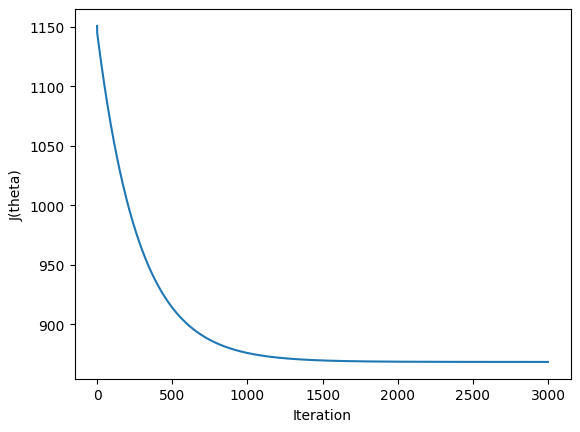

In [50]:
drawCostFunction()

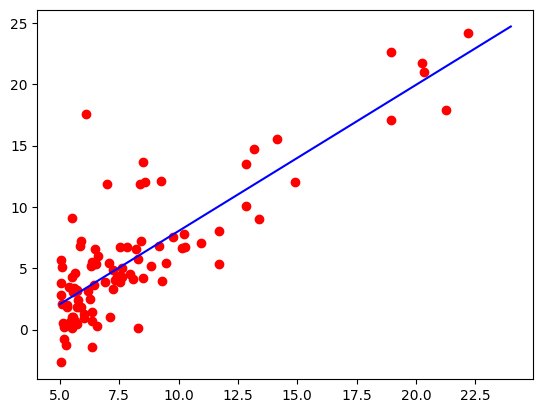

In [52]:
def drawResult():
  plt.scatter(df[0],df[1], color='red')
  x_value = [x for x in range(5, 25)]
  y_value = [x1*theta[1] + theta[0] for x1 in x_value]
  plt.plot(x_value, y_value, color='blue')
  plt.show

drawResult()

### Predict

In [53]:
def predict(X, theta):
  return np.dot(theta.transpose(), X)

In [54]:
input = np.array([1, 4.5])
print(predict(input, theta))

[1.48256758]
